# Tarefa 03

1) Corrigir a velocidade radial máxima pelo LSR.
2) Calclar a distância Galactocêntrica do ponto tagente.
3) Calcular $V(R_{t})$.
4) Plotar $V(R_{t})$ com barras de erros.

In [85]:
# encoding: utf-8
# encoding: iso-8859-1
# encoding: win-1252
# -*- coding: cp1252 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [86]:
Tabela = pd.DataFrame({'l' : np.linspace(5.,85.,17)})
Tabela

,l
0,5.0
1,10.0
2,15.0
3,20.0
4,25.0
5,30.0
6,35.0
7,40.0
8,45.0
9,50.0


In [87]:
Tabela['Vsun_r(km/s)'] = [53.5,77.7,144.4,127.4,118.1,112.8,108.9,96.3,82.6,80.3,72.5,47.9,33.0,34.6,26.4,35.3,27.4]
Tabela['ErrVsun_r'] = [8.5,8.5,8.5,8.5,8.5,4.2,4.2,8.5,4.2,4.2,8.5,4.2,4.2,8.5,8.5,4.2,8.5]
Tabela

,l,Vsun_r(km/s),ErrVsun_r
0,5.0,53.5,8.5
1,10.0,77.7,8.5
2,15.0,144.4,8.5
3,20.0,127.4,8.5
4,25.0,118.1,8.5
5,30.0,112.8,4.2
6,35.0,108.9,4.2
7,40.0,96.3,8.5
8,45.0,82.6,4.2
9,50.0,80.3,4.2


Vamos usar os valores estimados por Coskunoglu et. al. (2011) para fazer a correção no sistema LSR

\begin{align}
u_{\odot} &= 8.50 \pm 0.29\\
v_{\odot} &= 13.38 \pm 0.43\\
w_{\odot} &= 6.49 \pm 0.26
\end{align}

A correção da velocidade no sistema LSR é obtida dos valores de Coskunoglu

\begin{equation}
V_{LSR} = V_{r,max}^{\odot} + V_{Plano}
\end{equation}

Onde $V_{Plano}=\sqrt{u_{\odot}^{2}+v_{\odot}^{2}}$ é a velocidade no plano de rotação

O erro da velocidade no sistema LSR é estiado pela siguente formula:

\begin{equation}
\Delta V_{LSR} = \Delta V_{r}^{\odot} + \dfrac{u\delta u + v\delta v}{V_{Plano}}
\end{equation}

In [88]:
# Velocities Coskunoglu et. al. 
u_sun = 8.50
du = 0.29
v_sun = 13.38
dv = 0.43
w_sun = 6.49
dw = 0.26
Vplano = np.sqrt(u_sun**2.+v_sun**2.)
Tabela['Vlsr'] = Tabela['Vsun_r(km/s)'] + Vplano
Tabela['Delta Vlsr'] = Tabela['ErrVsun_r'] + (u_sun*du + v_sun*dv)/Vplano
Tabela

,l,Vsun_r(km/s),ErrVsun_r,Vlsr,Delta Vlsr
0,5.0,53.5,8.5,69.351637,9.018457
1,10.0,77.7,8.5,93.551637,9.018457
2,15.0,144.4,8.5,160.251637,9.018457
3,20.0,127.4,8.5,143.251637,9.018457
4,25.0,118.1,8.5,133.951637,9.018457
5,30.0,112.8,4.2,128.651637,4.718457
6,35.0,108.9,4.2,124.751637,4.718457
7,40.0,96.3,8.5,112.151637,9.018457
8,45.0,82.6,4.2,98.451637,4.718457
9,50.0,80.3,4.2,96.151637,4.718457


In [89]:
Rsun = 8.5
Rt = Rsun*np.sin(np.radians(Tabela['l']))
Tabela['Rt'] = Rt

A velocidade de rotação pode ser calculada a partir da siguente equação:
\begin{equation}
V(R_{t}) = V_{r,max}^{\odot}(l_{t}) + V(R_{\odot})\sin l_{t}
\end{equation}
E o erro seria estimado por:
\begin{equation}
\Delta V(R_{t}) = \Delta V_{r,max}^{\odot}(l_{t}) + \Delta V(R_{\odot})\sin l_{t}
\end{equation}

In [90]:
Vsun = 220
ErrVsun = 15
Tabela['V(Rt)'] = Tabela['Vlsr'] + Vsun*np.sin(np.radians(Tabela['l']))
Tabela['ErrV(Rt)'] = Tabela['ErrVsun_r'] + ErrVsun*np.sin(np.radians(Tabela['l']))
Tabela

,l,Vsun_r(km/s),ErrVsun_r,Vlsr,Delta Vlsr,Rt,V(Rt),ErrV(Rt)
0,5.0,53.5,8.5,69.351637,9.018457,0.740824,88.525901,9.807336
1,10.0,77.7,8.5,93.551637,9.018457,1.476010,131.754236,11.104723
2,15.0,144.4,8.5,160.251637,9.018457,2.199962,217.191827,12.382286
3,20.0,127.4,8.5,143.251637,9.018457,2.907171,218.496069,13.630302
4,25.0,118.1,8.5,133.951637,9.018457,3.592255,226.927655,14.839274
5,30.0,112.8,4.2,128.651637,4.718457,4.250000,238.651637,11.700000
6,35.0,108.9,4.2,124.751637,4.718457,4.875400,250.938453,12.803647
7,40.0,96.3,8.5,112.151637,9.018457,5.463695,253.564911,18.141814
8,45.0,82.6,4.2,98.451637,4.718457,6.010408,254.015129,14.806602
9,50.0,80.3,4.2,96.151637,4.718457,6.511378,264.681415,15.690667


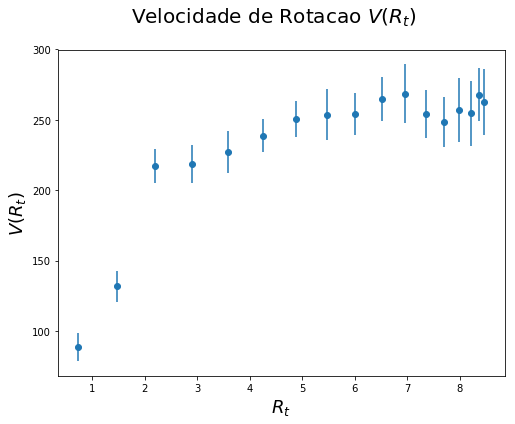

In [91]:
plt.figure(figsize=(8,6))
plt.errorbar(Tabela['Rt'], Tabela['V(Rt)'], yerr = Tabela['ErrV(Rt)'],fmt='o')
plt.suptitle('Velocidade de Rotacao $V(R_{t})$',fontsize=20)
plt.xlabel('$R_{t}$',fontsize=18)
plt.ylabel('$V(R_{t})$',fontsize=18)

### Referencias

* B. Coşkunoğlu, S. Ak, S. Bilir, S. Karaali, E. Yaz, G. Gilmore, G. M. Seabroke, O. Bienaymé, J. Bland-Hawthorn, R. Campbell, K. C. Freeman, B. Gibson, E. K. Grebel, U. Munari, J. F. Navarro, Q. A. Parker, A. Siebert, A. Siviero, M. Steinmetz, F. G. Watson, R. F. G. Wyse, T. Zwitter; Local stellar kinematics from RAVE data – I. Local standard of rest. Mon Not R Astron Soc 2011; 412 (2): 1237-1245. doi: 10.1111/j.1365-2966.2010.17983.x